In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# !pip install prophet

In [28]:
#leio o csv de pedidos
df = pd.read_csv('pedidos_magalu.csv')


df = df[['data','pedidos']]

#tranformo a data em data pro prophet entender
df['data'] = pd.to_datetime(df['data'])

#mudo os nomes das colunas pro prophet entender
df.columns = ['ds', 'y']
df.tail(20)

,ds,y
36,2021-01-01,3548429
37,2021-02-01,2736818
38,2021-03-01,3571499
39,2021-04-01,3663902
40,2021-05-01,3885570
41,2021-06-01,3344983
42,2021-07-01,3431133
43,2021-08-01,3471314
44,2021-09-01,3578321
45,2021-10-01,3468775


In [29]:
#aqui eu crio uma coluna com o feriado Black Friday pro prophet entender que Novembro é um mês atípico
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(
                                 ['2018-11-01',
                                  '2019-11-01',
                                  '2020-11-01',
                                  '2021-11-01',
                                  '2022-11-01'])})

black_friday

,holiday,ds
0,Black Friday,2018-11-01
1,Black Friday,2019-11-01
2,Black Friday,2020-11-01
3,Black Friday,2021-11-01
4,Black Friday,2022-11-01


15:34:35 - cmdstanpy - INFO - Chain [1] start processing
15:34:35 - cmdstanpy - INFO - Chain [1] done processing


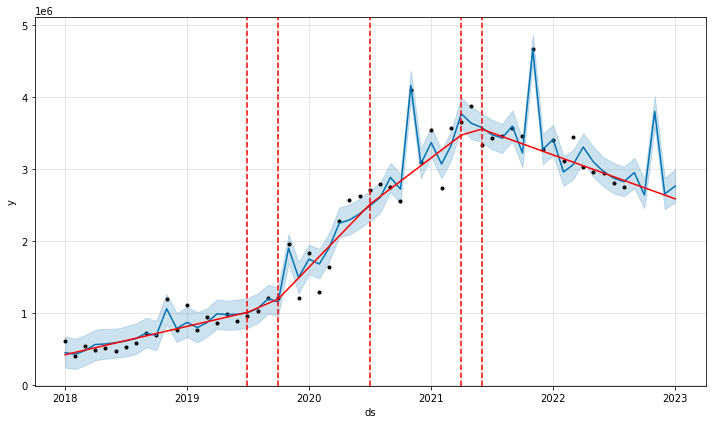

In [34]:
#monto o modelo Prophet
model = Prophet(seasonality_mode='multiplicative',
                changepoint_range=0.75,
                changepoint_prior_scale=0.25,
                yearly_seasonality=4,
                n_changepoints=25,
                holidays=black_friday)

model.fit(df)

future = model.make_future_dataframe(periods=5, freq='MS')

forecast = model.predict(future)

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show(fig)

In [32]:
forecast.tail().T

,56,57,58,59,60
ds,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
trend,2795578.69554,2745413.906016,2693576.95684,2643412.167315,2591575.218139
yhat_lower,2754080.187143,2438386.310978,3595714.716677,2433837.749784,2548706.406479
yhat_upper,3160727.977556,2855526.170438,4017126.202111,2869399.512484,2984806.209381
trend_lower,2789400.038624,2726457.382348,2656209.815104,2583656.854939,2506192.181017
trend_upper,2801331.512599,2764200.941685,2731932.697786,2704260.388869,2675772.685751
Black Friday,0.0,0.0,0.557608,0.0,0.0
Black Friday_lower,0.0,0.0,0.557608,0.0,0.0
Black Friday_upper,0.0,0.0,0.557608,0.0,0.0
holidays,0.0,0.0,0.557608,0.0,0.0
